In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="whitegrid")
import scipy.stats as stats

In [128]:
df = pd.read_csv('../data/combined_results.csv')
df.head()

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage
0,1c-syntax/bsl-language-server,1.0,0,1.0,1.0,1,64.0,36.0,752.0,40997.0,NaN
1,abhpd/hacktoberfest2021,NaN,0,NaN,NaN,0,14.0,14.0,52.0,7629.0,NaN
2,actiontech/dble,1.0,1,1.0,1.0,1,17.0,1.0,58.0,1513.0,8.02
3,activiti/activiti,1.0,1,1.0,1.0,1,31.0,13.0,70.0,2696.0,NaN
4,adeekshith/watomatic,NaN,0,NaN,NaN,0,16.0,11.0,88.0,2392.0,NaN


# CI usage vs. Local builds

In [129]:
df_grouped = df.groupby(by=['ci_usage', 'local_build']).count().reset_index()
df_grouped.head()

,ci_usage,local_build,repo_name,sat_usage,ci_build_combined,ci_state,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage
0,0,0.0,149,149,0,0,143,143,143,143,0
1,0,1.0,201,201,0,0,196,196,196,196,83
2,1,0.0,239,239,220,239,237,237,237,237,0
3,1,1.0,458,458,424,458,445,445,445,445,227


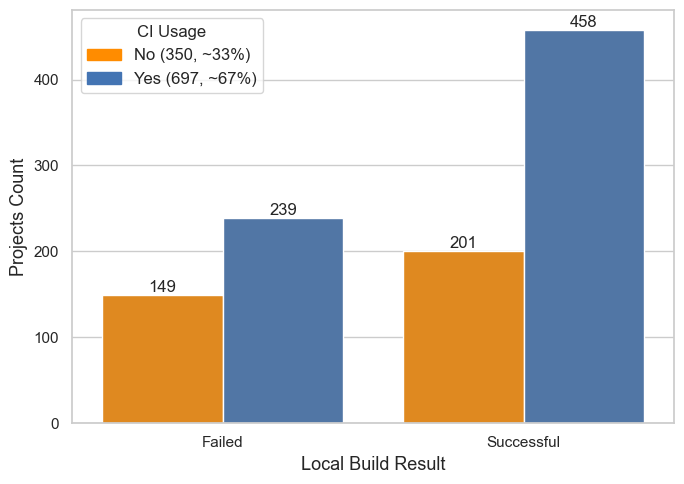

In [130]:

# Create an array with the colors you want to use
colors = ["#FF8C00", "#4374B3"]
# Set your custom color palette
sns.set(font_scale=1)

sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="local_build", y="repo_name", hue="ci_usage", data=df_grouped)
ax.set_xlabel("Local Build Result", fontsize = 13)
ax.set_ylabel("Projects Count", fontsize = 13)

orange_patch = mpatches.Patch(color=colors[0])
blue_patch = mpatches.Patch(color=colors[1])

ax.legend(title='CI Usage', labels=['No (350, ~33%)', 'Yes (697, ~67%)'], handles=[orange_patch, blue_patch], fontsize = 12)

plt.xticks([0,1], ['Failed', 'Successful'])
for container in ax.containers:
    ax.bar_label(container)
    
plt.gcf().set_size_inches(7,5)
plt.tight_layout()
plt.savefig('../figures/ci-usage-bar-chart.pdf', dpi=300)


In [131]:
stats_df = pd.DataFrame({'No Build': [149, 239],
                   'Yes Build' : [201, 458]},index ={'No CI','Yes CI'})
stats_df

,No Build,Yes Build
Yes CI,149,201
No CI,239,458


In [132]:
def cal_chi_sq_cramer_v(stats_df):
    chiRes = stats.chi2_contingency(stats_df)
    # Details
    print(f'chi-square statistic: {chiRes[0]}')
    print(f'p-value: {chiRes[1]}')
    print(f'degree of freedom: {chiRes[2]}')
    print('expected contingency table') 
    print(chiRes[3])
    # chi-square test statistic (alternative method to derive chi-sq stat)
    chisq_stat = stats.chi2_contingency(stats_df, correction=False)[0]
    # sample size
    n = np.sum(np.sum(stats_df))
    # minimum of rows & columns
    minshape = min(stats_df.shape)-1
    # Cramer's v
    V_ = np.sqrt( (chisq_stat/n)/minshape)
    print(f"Cramer' V: {V_}")

In [133]:
cal_chi_sq_cramer_v(stats_df)

chi-square statistic: 6.500650826607792
p-value: 0.010783501227885914
degree of freedom: 1
expected contingency table
[[129.70391595 220.29608405]
 [258.29608405 438.70391595]]
Cramer' V: 0.0808922438777348


# CI buids vs. Local builds

In [134]:
df_grouped = df.groupby(by=['ci_build_combined', 'local_build']).count().reset_index()
df_grouped.head()

,ci_build_combined,local_build,repo_name,sat_usage,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage
0,0.0,0.0,48,48,48,48,48,48,48,48,0
1,0.0,1.0,59,59,59,59,58,58,58,58,31
2,1.0,0.0,172,172,172,172,171,171,171,171,0
3,1.0,1.0,365,365,365,365,358,358,358,358,180


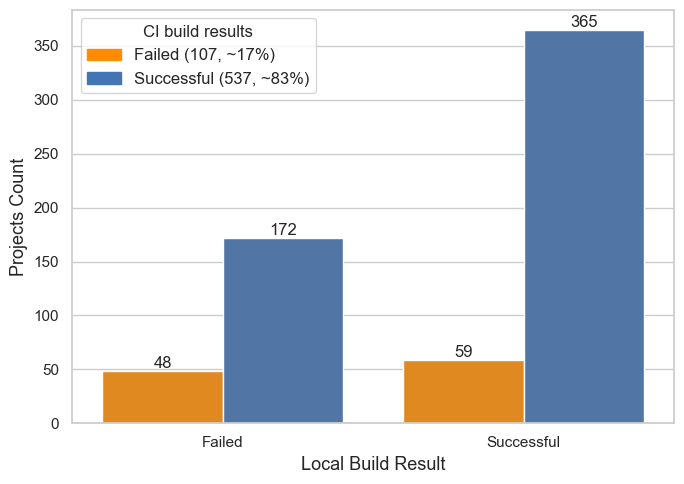

In [135]:

# Create an array with the colors you want to use
colors = ["#FF8C00", "#4374B3"]
# Set your custom color palette
sns.set(font_scale=1)

sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="local_build", y="repo_name", hue="ci_build_combined", data=df_grouped)
ax.set_xlabel("Local Build Result", fontsize = 13)
ax.set_ylabel("Projects Count", fontsize = 13)

orange_patch = mpatches.Patch(color=colors[0])
blue_patch = mpatches.Patch(color=colors[1])

ax.legend(title='CI build results', labels=['Failed (107, ~17%)', 'Successful (537, ~83%)'], handles=[orange_patch, blue_patch], fontsize = 12)

plt.xticks([0,1], ['Failed', 'Successful'])
for container in ax.containers:
    ax.bar_label(container)
    
plt.gcf().set_size_inches(7,5)
plt.tight_layout()
plt.savefig('../figures/ci-local-builds-bar-chart.pdf', dpi=300)


In [136]:
stats_df = pd.DataFrame({'Failed Local': [48, 172],
                   'Successful Local' : [59, 365]},index ={'Failed CI','Successful CI'})
stats_df

,Failed Local,Successful Local
Successful CI,48,59
Failed CI,172,365


In [137]:
cal_chi_sq_cramer_v(stats_df)

chi-square statistic: 5.971968393183753
p-value: 0.014535047168153868
degree of freedom: 1
expected contingency table
[[ 36.55279503  70.44720497]
 [183.44720497 353.55279503]]
Cramer' V: 0.10069595524115173


## Add Code Review Metric

In [138]:
df['cr_rate'] = (df['cr_reviews'] + df['cr_comments']) / (df['cr_changed_lines'] / df['cr_changed_files'])

## Code Review / CI Usage / ASAT usage

First we'll remove cr_rate outliers:

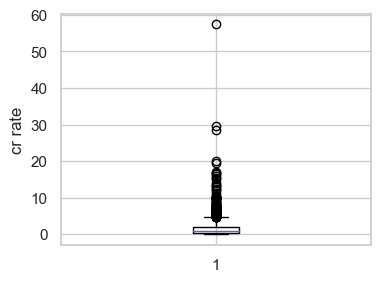

In [139]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots()
ax1.set_ylabel('cr rate')
ax1.boxplot(df[~df['cr_rate'].isna()]['cr_rate'])
# ax1.set_yscale('log')
plt.show()

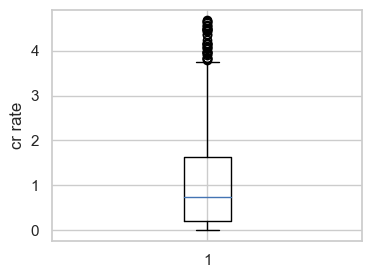

In [140]:
Q1 = df['cr_rate'].quantile(0.25)
Q3 = df['cr_rate'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['cr_rate'] >= Q1 - 1.5 * IQR) & (df['cr_rate'] <= Q3 + 1.5 *IQR)

plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots()
ax1.set_ylabel('cr rate')
ax1.boxplot(df.loc[filter]['cr_rate'])
plt.show()

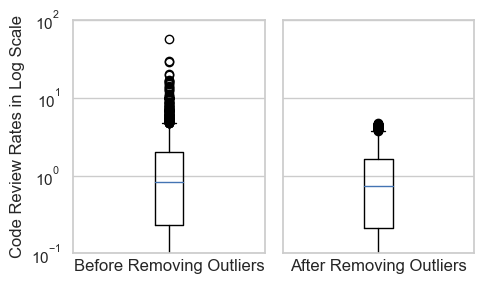

In [141]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots(1,2,sharey=True)
ax1[0].set_xlabel('Before Removing Outliers')
ax1[0].set_ylabel('Code Review Rates in Log Scale')
ax1[0].boxplot(df[~df['cr_rate'].isna()]['cr_rate'])
ax1[0].set_yscale('log')
ax1[0].set_xticks([0], [''])

# ax1[1].set_ylabel('Count of statuses per project')
ax1[1].set_xlabel('After Removing Outliers')
ax1[1].boxplot(df.loc[filter]['cr_rate'])
ax1[1].set_xticks([0], [''])

plt.ylim(0.1, 100)
plt.gcf().set_size_inches(5,3)
plt.tight_layout()
plt.savefig('../figures/code-review-metric-before-after.pdf', dpi=300)

In [146]:
df['ci_usage_new'] = df['ci_usage']

In [147]:
df[~df['cr_rate'].isna()]['cr_rate'].shape[0]

1398

In [148]:
df.loc[filter]['cr_rate'].shape[0]

1292

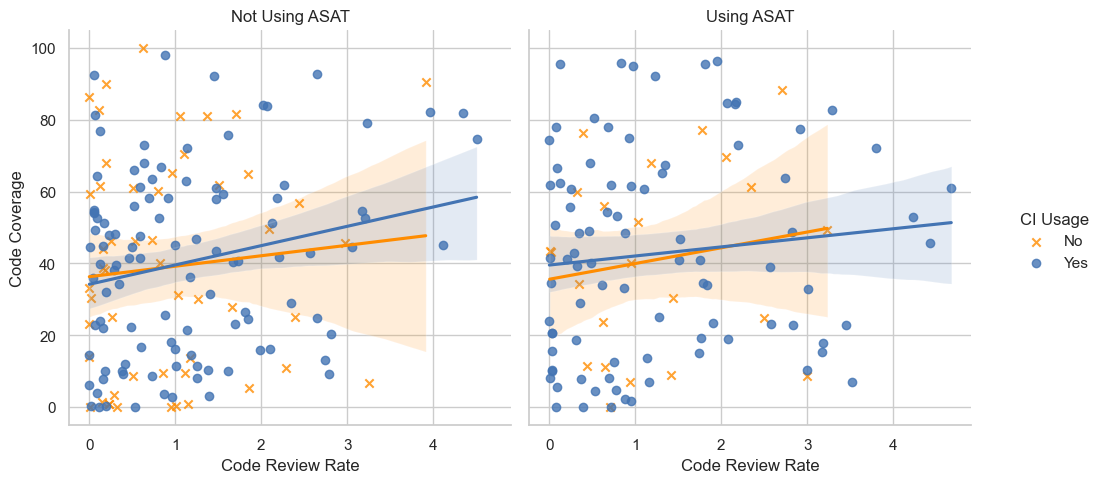

In [157]:
g = sns.lmplot(
    data=df.loc[filter],
    x="cr_rate", y="testing_coverage", col="sat_usage" ,hue="ci_usage_new", height=5, legend=True,
    markers=["x", "o"]
)
# plt.legend(title='CI Usage', loc='lower right', labels=['Yes', 'No'])

new_title = 'CI Usage'
g._legend.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.axes[0][0].set_title("Not Using ASAT")
g.axes[0][1].set_title("Using ASAT")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Code Review Rate", "Code Coverage")

plt.savefig('../figures/cc-cr-asat-ci.pdf', dpi=300)

Count of crosses / dots per each graph

In [158]:
no_asat_filter = (df['sat_usage'] == 0)
no_ci_filter = (df['ci_usage_new'] == 0)
asat_filter = (df['sat_usage'] == 1)
ci_filter = (df['ci_usage_new'] == 1)
with_testing_filter = (~df['testing_coverage'].isnull())

In [159]:
all_dots_count = df.loc[filter & with_testing_filter & ci_filter].shape[0]
all_crosses_count = df.loc[filter & with_testing_filter & no_ci_filter].shape[0]
left_side_count = df.loc[filter & with_testing_filter & no_asat_filter].shape[0]
right_side_count = df.loc[filter & with_testing_filter & asat_filter].shape[0]

left_dots_count = df.loc[filter & with_testing_filter & no_asat_filter & ci_filter].shape[0]
right_dots_count = df.loc[filter & with_testing_filter & asat_filter & ci_filter].shape[0]
left_crosses_count = df.loc[filter & with_testing_filter & no_asat_filter & no_ci_filter].shape[0]
right_crosses_count = df.loc[filter & with_testing_filter & asat_filter & no_ci_filter].shape[0]

print('all_dots_count', all_dots_count)
print('all_crosses_count', all_crosses_count)
print('left_side_count', left_side_count)
print('right_side_count', right_side_count)
print()
print('left_dots_count', left_dots_count)
print('right_dots_count', right_dots_count)
print('left_crosses_count', left_crosses_count)
print('right_crosses_count', right_crosses_count)

all_dots_count 195
all_crosses_count 75
left_side_count 158
right_side_count 112

left_dots_count 106
right_dots_count 89
left_crosses_count 52
right_crosses_count 23


In [160]:
print((right_dots_count + left_crosses_count) / 270)
print((right_crosses_count + left_dots_count) / 270)

0.5222222222222223
0.4777777777777778


In [161]:
print(right_dots_count / (right_dots_count + right_crosses_count))
print(left_dots_count / (left_dots_count + left_crosses_count))

0.7946428571428571
0.6708860759493671


# CI vs. ASAT

In [162]:
print(df[(df['ci_usage_new'] == 1) & (df['sat_usage'] == 1)].shape[0])
print(df[(df['ci_usage_new'] == 1) & (df['sat_usage'] == 0)].shape[0])
print(df[(df['ci_usage_new'] == 0) & (df['sat_usage'] == 1)].shape[0])
print(df[(df['ci_usage_new'] == 0) & (df['sat_usage'] == 0)].shape[0])

379
533
169
373


In [163]:
OD = pd.DataFrame({'No ASAT': [373, 533],
                   'Yes ASAT' : [169, 379]},index ={'CI Yes','CI No'})
OD

,No ASAT,Yes ASAT
CI No,373,169
CI Yes,533,379


In [164]:
chiRes = stats.chi2_contingency(OD)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print("{:.10f}". format(chiRes[1]))
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 15.147019782761388
p-value: 9.945517397323125e-05
0.0000994552
degree of freedom: 1
expected contingency table
[[337.72489684 204.27510316]
 [568.27510316 343.72489684]]


In [165]:
# chi-square test
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
# chi-square test statistic (alternative method to derive chi-sq stat)
chisq_stat = stats.chi2_contingency(OD, correction=False)[0]
# sample size
n = np.sum(np.sum(OD))
# minimum of rows & columns
minshape = min(OD.shape)-1
# Cramer's v
V_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Cramer' V: {V_}")

chi-square statistic: 15.147019782761388
p-value: 9.945517397323125e-05
Cramer' V: 0.10353358647952651


# CI vs. Testing

In [166]:
test_df = df[(~df['ci_usage_new'].isna()) & (~df['testing_coverage'].isna())]

In [167]:
test_df[['ci_usage_new', 'testing_coverage']]

,ci_usage_new,testing_coverage
2,1,8.02
8,1,48.47
11,1,4.71
26,1,36.06
29,0,11.13
...,...,...
1434,1,100.00
1435,1,100.00
1440,1,2.85
1443,1,60.88


In [168]:
result = stats.pointbiserialr(test_df['ci_usage_new'], test_df['testing_coverage'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0231
p-value: 0.69


# CI vs. Code Review

In [169]:
test_df = df[(~df['ci_usage_new'].isna()) & (~df['cr_rate'].isna())]

In [170]:
result = stats.pointbiserialr(test_df['ci_usage_new'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0317
p-value: 0.24


In [171]:
result = stats.pointbiserialr(test_df['cr_rate'], test_df['ci_usage_new'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0317
p-value: 0.24


After removing outliers of code review:

In [172]:
test_df = df.loc[filter &(~df['ci_usage_new'].isna()) & (~df['cr_rate'].isna())]
result = stats.pointbiserialr(test_df['ci_usage_new'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.1020
p-value: 0.00024


# ASAT vs. Code Review

In [173]:
test_df = df[(~df['sat_usage'].isna()) & (~df['cr_rate'].isna())]

result = stats.pointbiserialr(test_df['sat_usage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.0190
p-value: 0.48


After removing outliers:

In [174]:
test_df = df.loc[filter &(~df['sat_usage'].isna()) & (~df['cr_rate'].isna())]

result = stats.pointbiserialr(test_df['sat_usage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.1190
p-value: 1.8e-05


# Testing vs. Code Review

In [175]:
test_df = df[(~df['cr_rate'].isna()) & (~df['testing_coverage'].isna())]

result = stats.pointbiserialr(test_df['testing_coverage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.2912
p-value: 2.7e-07


In [176]:
test_df = df.loc[filter &(~df['testing_coverage'].isna()) & (~df['cr_rate'].isna())]

result = stats.pointbiserialr(test_df['testing_coverage'], test_df['cr_rate'])
print(f'correlation between X and y: {result[0]:.4f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.1542
p-value: 0.011


## Verification of Code review metric

In [101]:
df_pr_details = pd.read_csv("../data/pull_details.csv")

In [102]:
repo_name = df[df['cr_rate'] == df.cr_rate.quantile(1, interpolation='lower')]['repo_name'].item()
display(df[df['cr_rate'] == df.cr_rate.quantile(1, interpolation='lower')])
display(df_pr_details[df_pr_details['repo_name'] == repo_name].sample(n=5, random_state=2))

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage,cr_rate,cr_rate_limit
745,kiegroup/kogito-runtimes,NaN,0,NaN,NaN,0,165.0,310.0,535.0,4426.0,NaN,57.416403,57.42


,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
14691,kiegroup/kogito-runtimes,a703d0d78c65e2d802bed33378546958ca7e3c96,1473,1,10,7,9,1,8
14683,kiegroup/kogito-runtimes,a703d0d78c65e2d802bed33378546958ca7e3c96,1482,0,3,0,3,2,69
14697,kiegroup/kogito-runtimes,a703d0d78c65e2d802bed33378546958ca7e3c96,1465,0,2,0,17,2,51
14679,kiegroup/kogito-runtimes,a703d0d78c65e2d802bed33378546958ca7e3c96,1488,0,2,0,3,1,2
14688,kiegroup/kogito-runtimes,a703d0d78c65e2d802bed33378546958ca7e3c96,1476,1,26,31,25,38,1094


1473: reviewed by 2 reviewers, one reviewer requested a change, reviewer reacted to CI checks (8 lines changed)
1482: reviewed by 3 reviewers, one reviewer asked for clarification and author responded (69 lines changed in 2 files)
1465: reviewed by 2 reviewers, author asked a question from reviewer (51 lines changed in 2 files)
1488: reviewed by 2 reviewers (2 lines changed)
1476: reviewed by 4 reviewers, 2 reviewers requested changes on parts of the code (1094 lines changed in 38 files)

In [119]:
repo_name = df[df['cr_rate'] == df.cr_rate.quantile(.8, interpolation='lower')]['repo_name'].item()
display(df[df['cr_rate'] == df.cr_rate.quantile(.8, interpolation='lower')])
display(df_pr_details[df_pr_details['repo_name'] == repo_name].sample(n=5, random_state=2))

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage,cr_rate,cr_rate_limit
55,apache/activemq-artemis,1.0,1,1.0,1.0,1,37.0,48.0,80.0,2790.0,NaN,2.437276,2.44


,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
1092,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3654,0,0,0,2,9,235
1084,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3674,0,0,0,0,1,2
1098,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3645,0,0,0,0,2,10
1080,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3679,0,0,0,0,2,6
1089,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3661,0,0,0,1,2,57


- 3679: no sign of code reviews, merged by a user other than the author (6 lines changed in 2 files)
- 3678: merged by the same user
- 3677: author explains changes, merged by another user 
- 3673: 2 reviewers reviewed, changes requested
- 3676: a long discussion with 3 users involved, 1 reviewer approved the changes, change requested
- 3674: no sign of code reviews, merged by a user other than the author (2 lines changed)
- 3668: merged by another user, he said he couldn't verify the change and just trusted the author
- 3665: reviewed by 2 reviewers, change requested
- 3664: merged by another user
- 3661: reviewed by 1 reviewer (57 lines changed in 2 files)
- 3660: merged by the same user
- 3658: merged by the same user
- 3654: author self-reviewed and reacted to tests (235 lines changed in 9 files)
- 3651: merged by the same user, discussed with another user => resulted in a change
- 3650: a long discussion with 2 other users involved, merged by the same user
- 3649: reviewed by 1, changes applied after discussion
- 3648: merged by another user, no discussions
- 3647: merged by the same user
- 3645: no sign of code reviews, merged by a user other than the author (10 lines changed in 2 files)
I expect that the ones merged by another user have been reviewed.
- 3641: merged by the same user

In [121]:
display(df_pr_details[df_pr_details['repo_name'] == repo_name])

,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
1080,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3679,0,0,0,0,2,6
1081,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3678,0,0,0,0,1,2
1082,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3677,0,0,0,3,3,74
1083,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3676,0,5,3,15,11,76
1084,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3674,0,0,0,0,1,2
1085,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3673,0,17,15,11,7,163
1086,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3668,0,0,0,1,2,17
1087,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3665,0,4,3,0,3,67
1088,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3664,0,0,0,0,2,9
1089,apache/activemq-artemis,067247178f8838480a34d24a22bf5c7b22efaba8,3661,0,0,0,1,2,57


In [123]:
repo_name = df[df['cr_rate'] == df.cr_rate.quantile(.6, interpolation='lower')]['repo_name'].item()
display(df[df['cr_rate'] == df.cr_rate.quantile(.6, interpolation='lower')])
display(df_pr_details[df_pr_details['repo_name'] == repo_name].sample(n=5, random_state=2))

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage,cr_rate,cr_rate_limit
1078,radargun/radargun,0.0,1,1.0,1.0,1,16.0,11.0,91.0,2113.0,NaN,1.162802,1.16


,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
21049,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,686,0,1,0,1,1,2
21041,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,695,0,0,0,1,5,10
21055,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,680,0,0,0,1,1,11
21037,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,699,0,0,0,0,1,6
21046,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,689,0,1,4,1,3,95


- 699: no sign of code reviews, merged by a user other than the author
- 698: reviewed by 1 reviewer, 1 change requested
- 697: merged by the same user
- 696: no discussion - reviewed by 1
- 695: no discussion - merged by a user other than the author
- 694: no discussion - reviewed by 1
- 692: reviewed by 2 reviewers
- 691: reviewed by 1 reviewer, changes requested
- 690: no discussion - reviewed by 1
- 689: reviewed by 1 reviewer, changes requested by reviewer
- 688: no discussions - merged by another user
- 687: no discussions - reviewed by 1 reviewer
- 686: no discussions - reviewed by 1 reviewer
- 685: 1 change suggested by not applied! - reviewed by 1 reviewer
- 684: no discussions - reviewed by 1 reviewer
- 683: merged by the same user
- 682: no discussions - reviewed by 1 reviewer
- 681: no discussions - reviewed by 1 reviewer
- 680: reviewed by 1 reviewer - only LGTM conversation
- 678: merged by the same user

In [124]:
display(df_pr_details[df_pr_details['repo_name'] == repo_name])

,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
21037,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,699,0,0,0,0,1,6
21038,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,698,0,2,1,1,4,116
21039,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,697,0,0,0,0,1,2
21040,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,696,0,1,0,1,13,268
21041,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,695,0,0,0,1,5,10
21042,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,694,0,1,0,1,3,200
21043,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,692,0,2,1,0,2,4
21044,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,691,0,2,2,0,6,94
21045,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,690,0,1,1,1,12,296
21046,radargun/radargun,b5a1805fea3b474618cbf3d6279dc148f1bc98fb,689,0,1,4,1,3,95


In [125]:
repo_name = df[df['cr_rate'] == df.cr_rate.quantile(.4, interpolation='lower')]['repo_name'].item()
display(df[df['cr_rate'] == df.cr_rate.quantile(.4, interpolation='lower')])
display(df_pr_details[df_pr_details['repo_name'] == repo_name].sample(n=5, random_state=2))

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage,cr_rate,cr_rate_limit
1404,wocommunity/wonder,0.0,0,NaN,NaN,0,2.0,17.0,34.0,1205.0,NaN,0.5361,0.54


,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
27261,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,933,0,0,0,3,6,978
27253,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,948,0,0,0,0,1,2
27267,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,919,0,0,0,0,4,56
27249,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,954,0,0,0,3,1,3
27258,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,937,0,2,0,1,1,9


- 954: Merged by another user - change explained by author - discussion took place after merge (so no comments)
- 953: created by Dependabot - merged by another user
- 950: change explained by author - merged by another user
- 949: change explained by author - merged by another user
- 948: created by Dependabot - merged by another user
- 946: change explained by author - merged by another user
- 945: change explained by author - merged by another user -1 comment after merge
- 940: created by Dependabot - merged by another user
- 938: created by Dependabot - merged by another user
- 937: reviewed by 2 reviewers with discussions
- 936: created by Dependabot - merged by another user
- 934: change explained by author - merged by another user
- 933: 2 reviewers involved, changed requested
- 926: 1 reviewer asked questions - 1 other only merged - 2 reviewers involved
- 925: 1 reviewer asked for explanation and merged
- 924: change explained by author - merged by another user
- 923: change explained by author - merged by another user
- 920: merged by another user
- 919: no sign of code reviews, merged by a user other than the author. Author provided explanation in the beginning
- 918: merged by another user

In [126]:
display(df_pr_details[df_pr_details['repo_name'] == repo_name])

,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
27249,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,954,0,0,0,3,1,3
27250,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,953,0,0,0,0,1,2
27251,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,950,0,0,0,0,1,4
27252,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,949,0,0,0,1,4,5
27253,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,948,0,0,0,0,1,2
27254,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,946,0,0,0,0,1,14
27255,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,945,0,0,0,3,1,6
27256,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,940,0,0,0,0,1,2
27257,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,938,0,0,0,0,2,4
27258,wocommunity/wonder,4f262036924d8ace6cb5a089b4a0b233a92cdcb5,937,0,2,0,1,1,9


In [106]:
repo_name = df[df['cr_rate'] == df.cr_rate.quantile(.2, interpolation='lower')]['repo_name'].item()
display(df[df['cr_rate'] == df.cr_rate.quantile(.2, interpolation='lower')])
display(df_pr_details[df_pr_details['repo_name'] == repo_name].sample(n=5, random_state=2))

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage,cr_rate,cr_rate_limit
1348,uwetrottmann/seriesguide,NaN,0,1.0,1.0,1,1.0,11.0,1393.0,110067.0,NaN,0.151871,0.15


,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
26161,uwetrottmann/seriesguide,10fed4a275f8c171eb169e78dfae1dd0ca56b539,787,0,0,0,1,1,6
26153,uwetrottmann/seriesguide,10fed4a275f8c171eb169e78dfae1dd0ca56b539,798,0,0,0,1,63,584
26167,uwetrottmann/seriesguide,10fed4a275f8c171eb169e78dfae1dd0ca56b539,769,0,0,0,0,13,45
26149,uwetrottmann/seriesguide,10fed4a275f8c171eb169e78dfae1dd0ca56b539,810,0,0,0,1,110,11456
26158,uwetrottmann/seriesguide,10fed4a275f8c171eb169e78dfae1dd0ca56b539,790,0,0,0,1,51,986


- 787: reviewed by 1 reviewer, author explains the change
- 798: no other user involved except the author, no sign of self code review, contains one comment by GHA bot about tests
- 769: no other user involved except the author, no sign of self code review
- 810: no other user involved except the author, no sign of self code review, contains one comment by GHA bot about tests
- 790: no other user involved except the author, no sign of self code review, contains one comment by GHA bot about tests

In [107]:
repo_name = df[df['cr_rate'] == df.cr_rate.quantile(0, interpolation='lower')].sample(random_state = 2).repo_name.item()
display(df[df['cr_rate'] == df.cr_rate.quantile(0, interpolation='lower')].sample(random_state = 2))
display(df_pr_details[df_pr_details['repo_name'] == repo_name].sample(n=5, random_state=2))

,repo_name,local_build,sat_usage,ci_build_combined,ci_state,ci_usage,cr_reviews,cr_comments,cr_changed_files,cr_changed_lines,testing_coverage,cr_rate,cr_rate_limit
753,komamitsu/fluency,1.0,0,1.0,1.0,1,0.0,0.0,36.0,748.0,NaN,0.0,0.0


,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
14851,komamitsu/fluency,f886a8e90aea017394bd8b1d2cd8b3b3448735cc,199,0,0,0,0,1,2
14843,komamitsu/fluency,f886a8e90aea017394bd8b1d2cd8b3b3448735cc,223,0,0,0,0,1,3
14857,komamitsu/fluency,f886a8e90aea017394bd8b1d2cd8b3b3448735cc,192,0,0,0,0,1,2
14839,komamitsu/fluency,f886a8e90aea017394bd8b1d2cd8b3b3448735cc,248,0,0,0,0,1,2
14848,komamitsu/fluency,f886a8e90aea017394bd8b1d2cd8b3b3448735cc,204,0,0,0,0,1,2


- 199: author is a bot, no other user involved except the merger
- 223: no other user involved except the author, no sign of self code review
- 192: author is a bot, no other user involved except the merger
- 248: author is a bot, no other user involved except the merger
- 204: author is a bot, no other user involved except the merger

<AxesSubplot:ylabel='Frequency'>

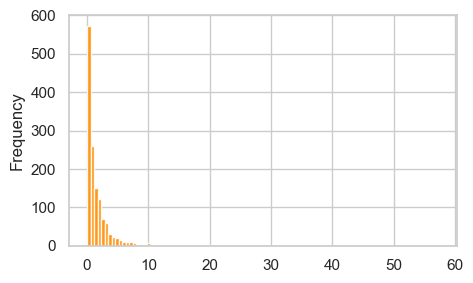

In [117]:
df['cr_rate'].plot.hist(bins=100, alpha=0.9)